# Ejercicio 2 - Implementación de una red neuronal
Vamos a implementar una red neuronal de $L$ capas, de forma genérica.

Para ello, al igual que hicimos con la regresión logística, implementaremos los diferentes métodos necesarios para entrenar la red y luego los combinaremos en el gradient descent.

Por último, analizaremos su efectividad clasificando un conjunto de puntos.

In [76]:
# Importamos nuestras librerías
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_moons

**Ejercicio 1**

Comenzaremos por realizar la inicalización de nuestros parámetros W y b para cada una de las capas. Para ello, vamos a usar un diccionario de parametros colocando dentro las matrices y vectores desde la capa $1$ hasta la $L$.

Recordar que la inicialización de $W$ debe ser aleatoria (np.random.randn) y la de $b$ puede ser con ceros (np.zero). Cada una de las matrices $W$ tiene tamaño $(n_i \times n_{i-1})$ y $b$ tiene tamaño $(n_i \times 1)$

In [77]:
def initialize_parameters(layer_neurons):
    L = len(layer_neurons)
    params = {}
    
    for i in range(1, L):
        params[f"W{i}"] = np.random.randn(layer_neurons[i], layer_neurons[i-1])
        params[f"b{i}"] = np.zeros((layer_neurons[i],1), dtype=int) 
    return params

In [78]:
np.random.seed(1)

layer_neurons = [2, 3, 2, 1]

parameters = initialize_parameters(layer_neurons)

W1 = np.array([[1.62434536, -0.61175641], [-0.52817175, -1.07296862], [0.86540763, -2.3015387]])
b1 = np.array([[0], [0], [0]])
W2 = np.array([[1.74481176, -0.7612069, 0.3190391], [-0.24937038, 1.46210794, -2.06014071]])
b2 = np.array([[0], [0]])
W3 = np.array([[-0.3224172, -0.38405435]])
b3 = np.array([[0]])

assert(len(parameters) == 6)
assert(np.isclose(W1, parameters["W1"]).all())
assert(np.isclose(b1, parameters["b1"]).all())
assert(np.isclose(W2, parameters["W2"]).all())
assert(np.isclose(b2, parameters["b2"]).all())
assert(np.isclose(W3, parameters["W3"]).all())
assert(np.isclose(b3, parameters["b3"]).all())


**Ejercicio 2**

Implementaremos algunas funciones auxiliares y el forward propagation de nuestra red. Recordar que:

$\sigma (X) = \frac{1}{1 + e^{-X}}$

$\sigma' (X) = \sigma(X) (1 - \sigma(X))$

$J(W, b) = - \frac{1}{m} \times \sum \limits _{i = 1}^{m} \Big ( y^{(i)}ln\hat y^{(i)} + (1 - y^{(i)})ln(1 - \hat y^{(i)}) \Big )$

$\frac{\partial J}{\partial A^{[L]}} = - \frac{y}{\hat y} + \frac{1-y}{1-\hat y}$

In [79]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
    
def calculate_cost(Y, Yhat):
    m = Y.shape[1]
    return (-1/m) * np.sum(Y @ np.log(Yhat).T + (1 - Y) @ np.log(1 - Yhat).T)
    
def sigmoid_derivative(X):
    s = sigmoid(X)
    return np.multiply(s, (1-s))    
    
def cost_derivative(Y, Yhat):
    return (-Y/Yhat)+((1-Y)/(1-Yhat))

**Ejercicio 3**

Ahora, implementaremos forward propagation en toda nuestra red. Recordar que:

$Z^{[k+1]} = W \times A^{[k]} + b$

$A^{[k+1]} = \sigma (Z^{[k+1]})$

$A^{[0]} = X, A^{[L]} = \hat Y$

In [80]:
def forward_propagate(A, W, b):
    Z_next = W @ A + b
    A_next = sigmoid(Z_next)
            
    return Z_next, A_next

def forward_propagate_all(X, params, layer_neurons):
    L = len(layer_neurons)
    intermediate_res = {}
    
    A = X
    intermediate_res["A0"] = X
    
    for i in range(1, L):
        Z, A = forward_propagate(A,params[f"W{i}"],params[f"b{i}"])
        
        intermediate_res[f"Z{i}"] = Z
        intermediate_res[f"A{i}"] = A
        
    return A, intermediate_res

**Ejercicio 4**

Ahora implementaremos backpropagation para nuestra red genérica. Recordar que:

$dA^{[k]} = W^{[k+1]T} \times dZ^{[k+1]}$

$dZ^{[k]} = dA^{[k]} * \sigma' (Z^{[k]})$

$dW^{[k]} = \frac{1}{m}dZ^{[k]} \times A^{[k-1]T}$

$db^{[k]} = \frac{1}{m}\sum \limits _{i=1}^{m} dZ^{[k](i)}$

In [81]:
def backward_propagate(dA, Z, W, A_prev):
    m = Z.shape[1]
    
    dZ = np.multiply(dA, sigmoid_derivative(Z))
    dW = ((1/m) * dZ) @ A_prev.T
    db = (1/m) * np.reshape(np.sum(dZ,axis=1), (-1, 1))
    dA_prev = W.T @ dZ
    
    return dA_prev, dW, db

def backward_propagate_all(Y, Yhat, params, intermediate_res, layer_neurons):
    L = len(layer_neurons)
    
    dA = cost_derivative(Y, Yhat)
    
    for i in range(L - 1, 0, -1):
        dA, dW, db = backward_propagate(dA, intermediate_res[f"Z{i}"], params[f"W{i}"], intermediate_res[f"A{i - 1}"])
                
        params[f"dA{i}"] = dA
        params[f"dW{i}"] = dW
        params[f"db{i}"] = db

**Ejercicio 5**

Por último, implementaremos nuestro método update_parameters para actualizar todos los parámetros de la red:

In [82]:
def update_parameters(params, layer_neurons, learning_rate):
    L = len(layer_neurons)
    
    for i in range(1, L):
        params[f"W{i}"] = params[f"W{i}"] - (learning_rate * params[f"dW{i}"])
        params[f"b{i}"] = params[f"b{i}"] - (learning_rate * params[f"db{i}"])

**¡Felicitaciones, implementaste tu primera red neuronal genérica!**

Ahora uniremos todo en gradient_descent y probaremos nuestra red.

In [83]:
def gradient_descent(X, Y, learning_rate = 0.01, iterations = 1000, layer_hidden_neurons = [100, 50]):
    layer_neurons = [X.shape[0]] + layer_hidden_neurons + [Y.shape[0]]
    params = initialize_parameters(layer_neurons)
    
    for i in range(iterations):
        A, intermediate_res = forward_propagate_all(X, params, layer_neurons)
        
        if i % 200 == 0:
            print(calculate_cost(Y, A))
            
        backward_propagate_all(Y, A, params, intermediate_res, layer_neurons)
        
        update_parameters(params, layer_neurons, learning_rate)
        
    return params, intermediate_res

In [84]:
np.random.seed(1)

X = np.array([[1, 2, 3], [0.1, 0.3, 0.5], [10, 3, 4]])
Y = np.array([[1, 0, 1]])

params, intermediate_res = gradient_descent(X, Y, layer_hidden_neurons = [2, 3])

params_expected, intermediate_res_expected = pickle.load(open("parametros.p", 'rb'))

for key in params_expected:
    assert(np.isclose(params_expected[key], params[key]).all())
for key in intermediate_res_expected:
    assert(np.isclose(intermediate_res_expected[key], intermediate_res[key]).all())
    

0.6689338746216831
0.658560502696018
0.6547179812565781
0.6517422652240885
0.6490407473819515


In [85]:
def calculate_score(Y, Yhat):
    # Calcula el score de nuestra predicción
    m = Yhat.shape[1]
    return np.squeeze(np.sum(Y == (Yhat > 0.5), axis = 1) / m)

1.928866866357
0.2555227526130046
0.15853737477045118
0.10235358612921758
0.07041537840287912
0.05128272456459377
0.039083140836057406
0.03092365627510585
0.02528574538297105
0.021237429600294545
Score: 1.0


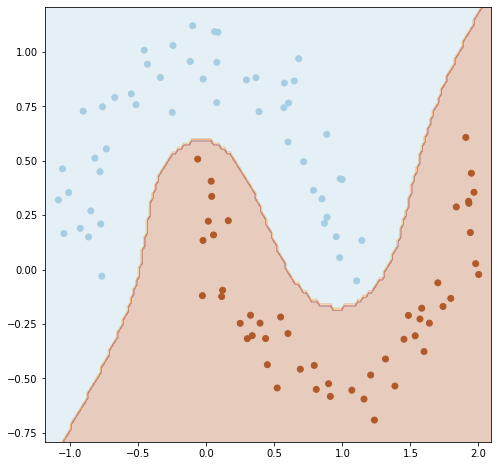

In [86]:
X1, Y1, = make_moons(noise = 0.1)

hidden_neurons = [100, 100, 10]

params, intermediate_res = gradient_descent(X1.T, Y1.reshape(1, -1), learning_rate = 0.1, iterations = 2000, layer_hidden_neurons = hidden_neurons)

A1, _ = forward_propagate_all(X1.T, params, [2] + hidden_neurons + [1])

print(f"Score: {calculate_score(Y1.reshape(1, -1), A1)}")

h = .02
x_min, x_max = X1[:, 0].min() - .1, X1[:, 0].max() + .1
y_min, y_max = X1[:, 1].min() - .1, X1[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

A, _ = forward_propagate_all(np.c_[xx.ravel(), yy.ravel()].T, params, [2] + hidden_neurons + [1])

plt.figure(figsize=(8,8))
Yhat = np.array(A > 0.5, dtype = int)
Yhat = Yhat.reshape(xx.shape)

plt.contourf(xx, yy, Yhat, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap=plt.cm.Paired)